In [172]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import cycler

from mpltools import style
from mpltools import layout
plt.style.use('seaborn-poster')

#plt.style.use('ggplot')


In [24]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [25]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,La strada nel bosco,2003
1,Loves of an Actress,1928
2,Little Miss Marker,1980
3,Kingdom Come,2013
4,Mr Bartholomew: The Hitman Cometh,2019


In [26]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [27]:
titles['title'].value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Maya                    12
Temptation              12
The Three Musketeers    11
Freedom                 11
Othello                 11
Honeymoon               11
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [28]:
a = titles
a = a[a.year >= 1930]
a = a[a.year < 1940]
a = a.year.value_counts()
a = a.sort_values(ascending=False).head(3)
a

1937    1224
1936    1169
1938    1163
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

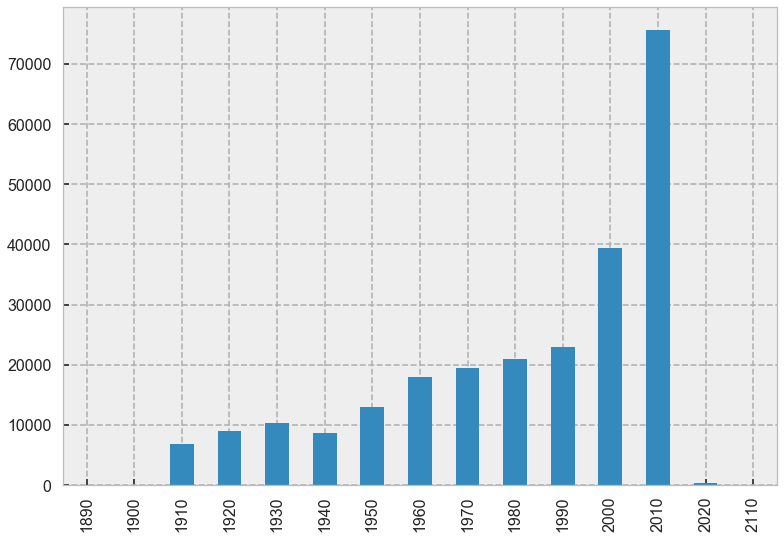

In [29]:
a = titles
a['decade'] = (a['year'] // 10) * 10
a = a['decade'].value_counts().sort_index()
a.plot(kind = 'bar')

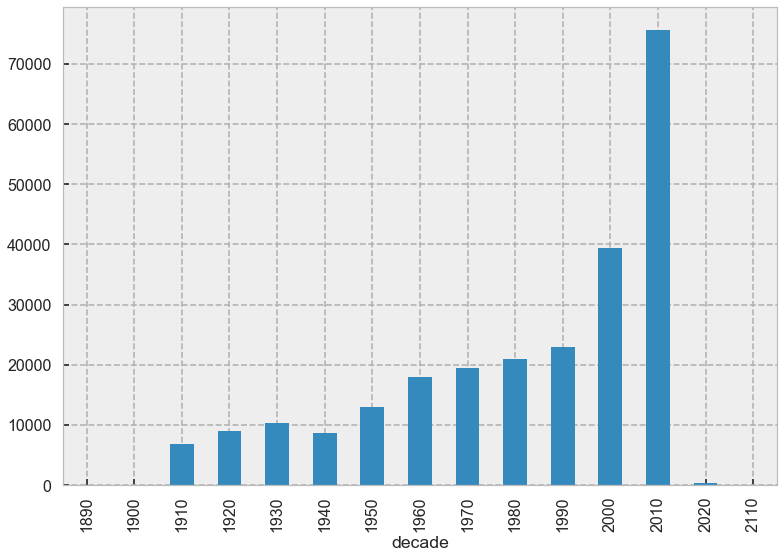

In [30]:
a = titles
a['decade'] = (a['year'] // 10) * 10
a.groupby(by='decade').size().plot(kind = 'bar')

### Plot the number of "Hamlet" films made each decade.

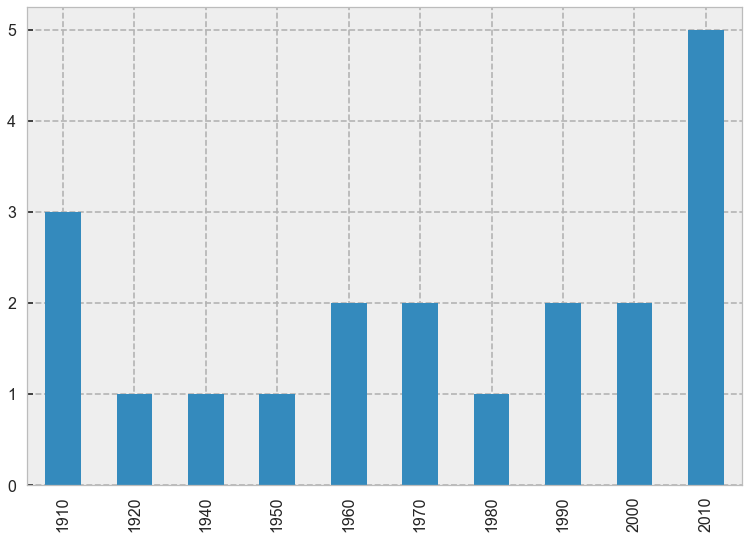

In [31]:
a = titles
a = a[a.title == 'Hamlet']
a = a['decade'].value_counts().sort_index()
a.plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

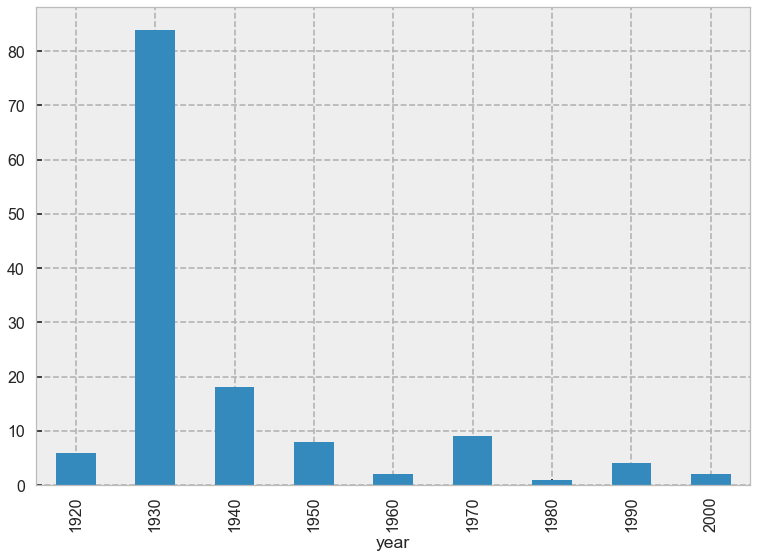

In [42]:
a = cast
a = a[a.character == 'Rustler']
a.groupby(by = (a['year'] // 10) * 10).size().plot(kind = 'bar')

### Plot the number of "Batman" characters each decade.

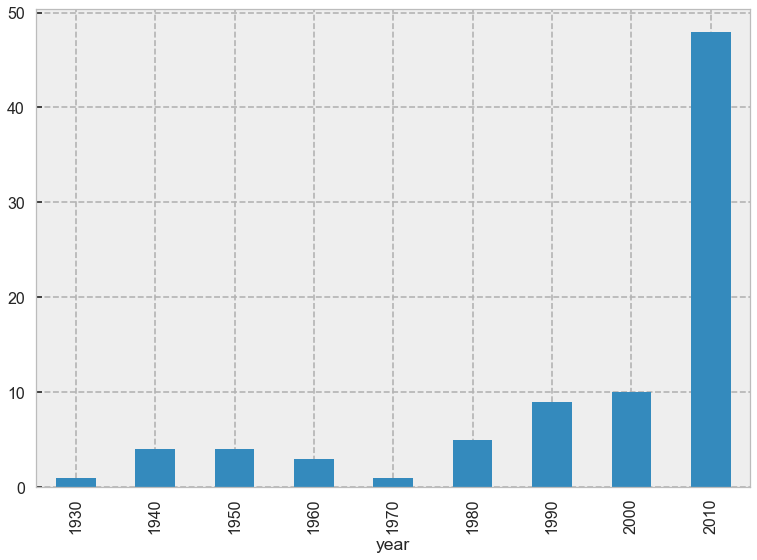

In [46]:
cast[cast.character == 'Batman'].groupby(by = (cast.year // 10) * 10).size().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [49]:
cast.groupby(by = 'character').size().sort_values(ascending = False).head(11)

character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Herself         6705
dtype: int64

In [51]:
cast['character'].value_counts().head(11)

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Herself         6705
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [56]:
cast[cast.character == 'Herself'].name.value_counts().head(10)

Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Hillary Clinton               8
Margaret Thatcher             8
Marta Berrocal                6
Marilyn Monroe                6
Sumie Sakai                   6
Mar?a Isabel (III) Mart?n     6
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [57]:
cast[cast.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [59]:
cast[cast.year == 1945].name.value_counts().head(1)

Emmett Vogan    39
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [100]:
cast[cast.year == 1985].name.value_counts().head(1)

Mammootty    22
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

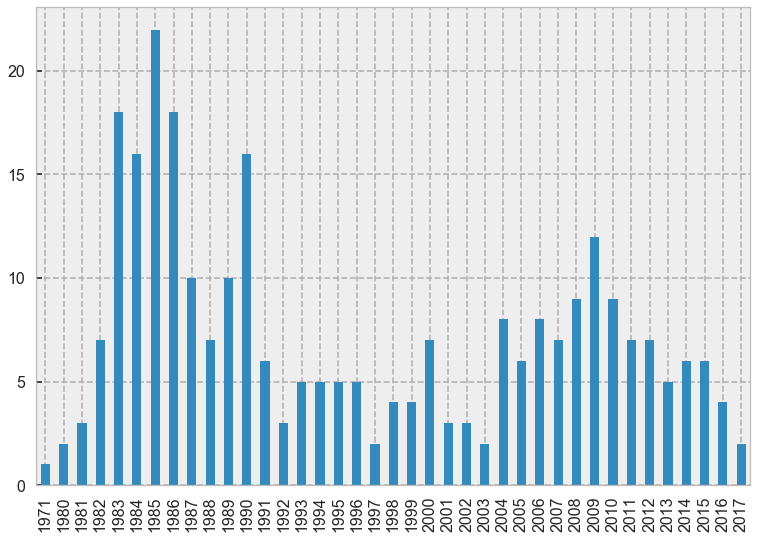

In [65]:
cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [70]:
cast[cast.character.str.startswith('Patron in')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in Restaurant             3
Patron in Club                   3
Patron in cabaret                3
Patron in booth                  2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [71]:
cast[cast.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Reporter         5
Science Kid              5
Science Club Member      5
Science Promo Cadet      5
Science Fair Kid         5
Science                  4
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

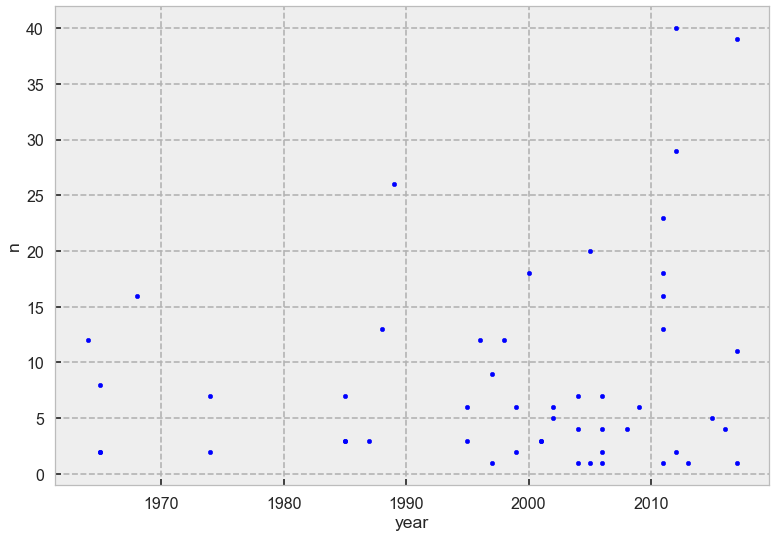

In [146]:
cast[cast.name == 'Judi Dench'].plot(x = 'year', y='n', kind = 'scatter')

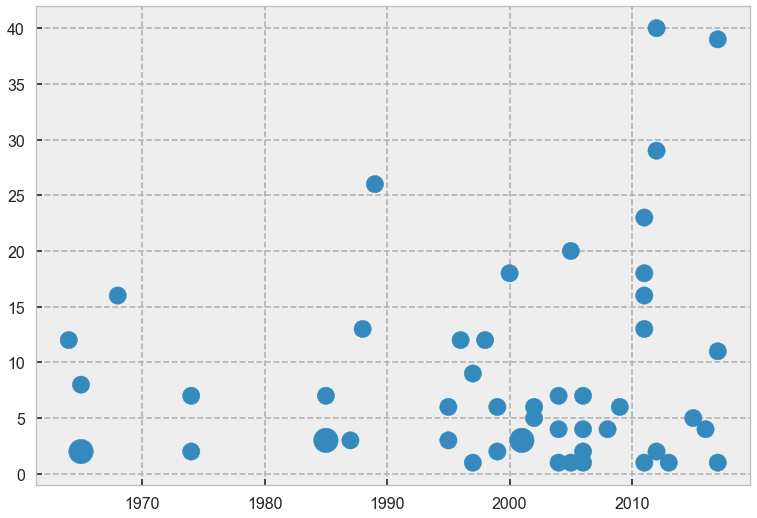

In [145]:
a = cast[cast.name == 'Judi Dench'].groupby(by = ['year','n']).size().to_frame().reset_index()
a.columns=['year','n','s']
plt.scatter(x = a.year, y = a.n, s = 300* a.s)

### Plot the n-values of Cary Grant's roles through his career.

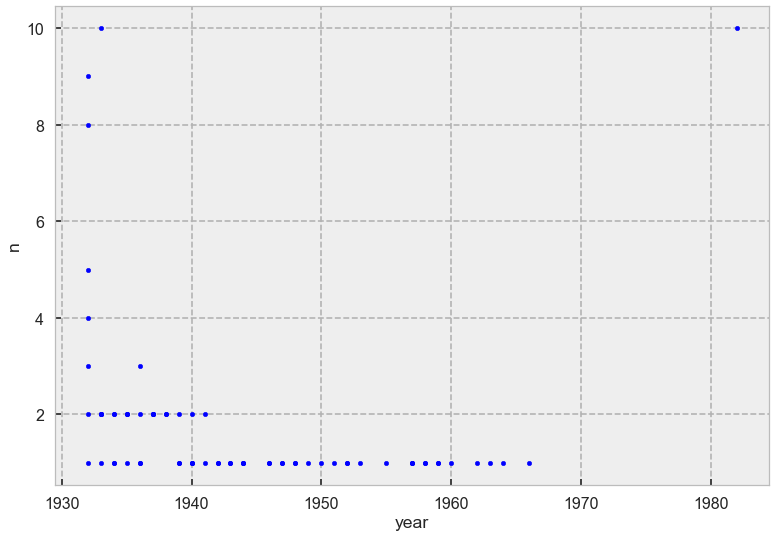

In [148]:
cast[cast.name == 'Cary Grant'].plot(x = 'year', y='n', kind = 'scatter')

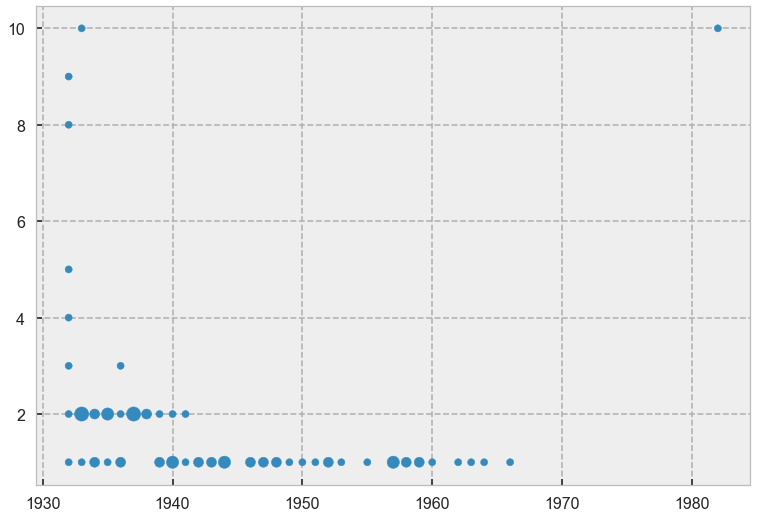

In [150]:
a = cast[cast.name == 'Cary Grant'].groupby(by = ['year','n']).size().to_frame().reset_index()
a.columns=['year','n','s']
plt.scatter(x = a.year, y = a.n, s = 50* a.s)

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

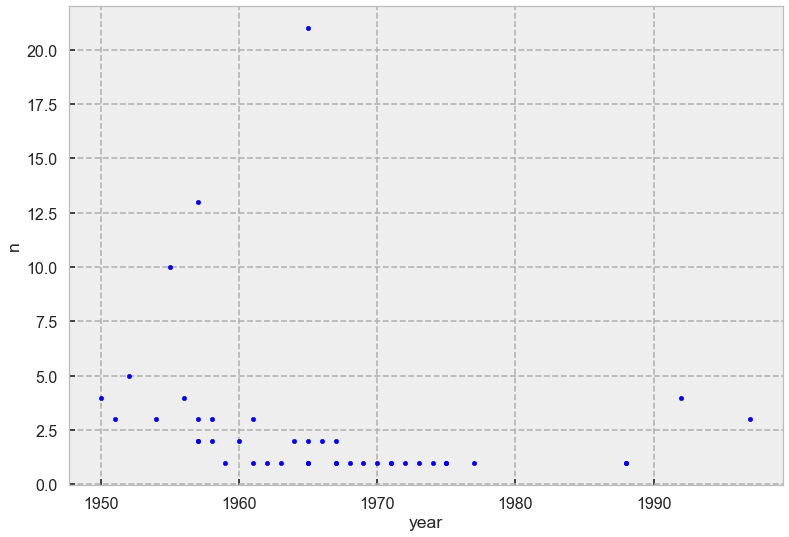

In [151]:
cast[cast.name == 'Sidney Poitier'].plot(x = 'year', y='n', kind = 'scatter')

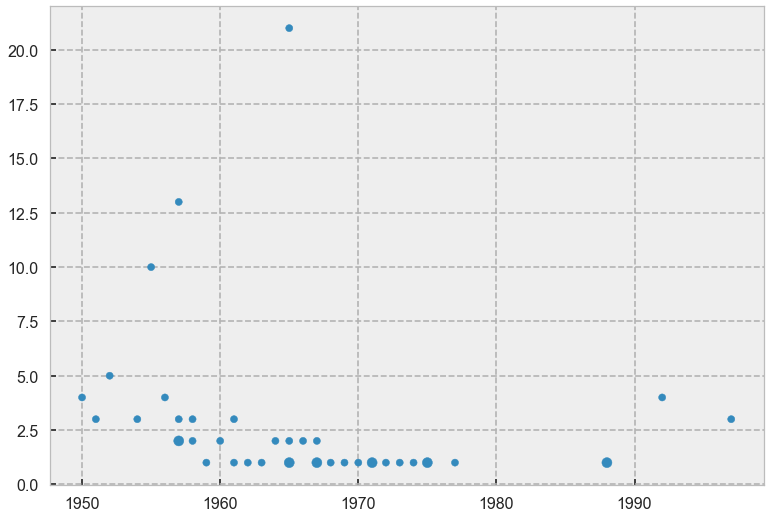

In [152]:
a = cast[cast.name == 'Sidney Poitier'].groupby(by = ['year','n']).size().to_frame().reset_index()
a.columns=['year','n','s']
plt.scatter(x = a.year, y = a.n, s = 50* a.s)

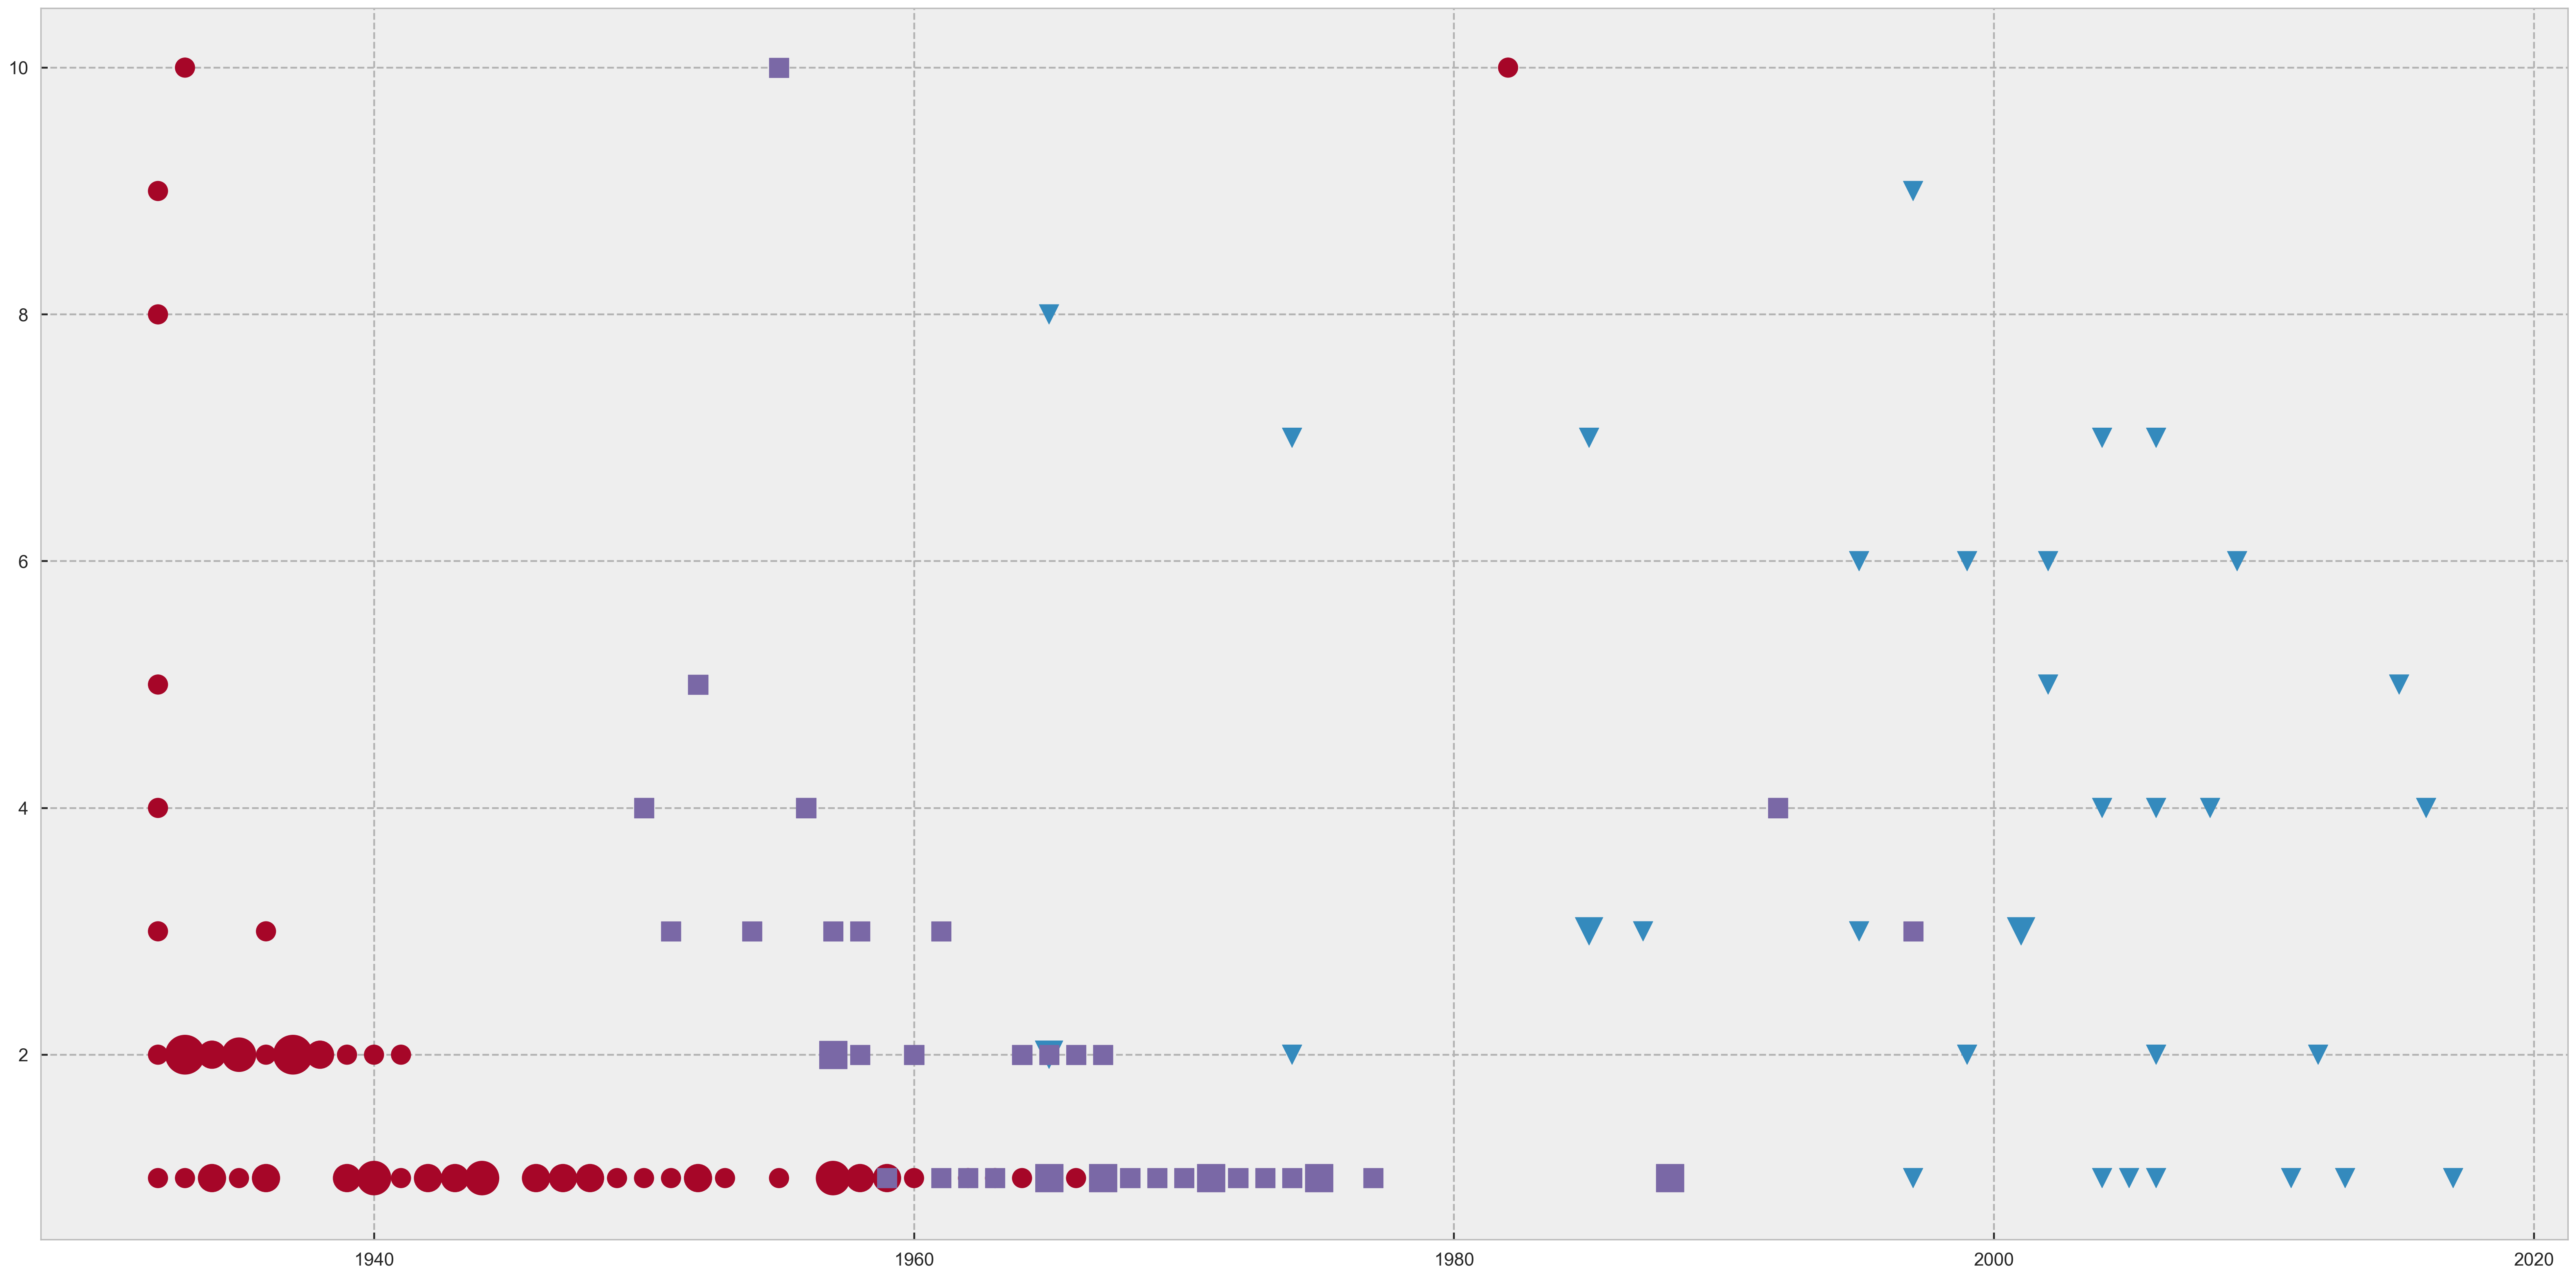

In [174]:
actors_list = {'Judi Dench': 'v', 'Cary Grant': 'o', 'Sidney Poitier':  's'}
plt.figure(figsize=(40, 20), dpi=200)
for k in actors_list:
    a = cast[(cast.name == k) & (cast.n <= 10)].groupby(by = ['year','n']).size().to_frame().reset_index()
    a.columns=['year','n','s']
    plt.scatter(x = a.year, y = a.n, marker = actors_list[k], s = 300* a.s, label = k)
plt.show()


### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [95]:
cast[(cast.year // 10 * 10 == 1950) & (cast.n == 1)].type.value_counts()

actor      6692
actress    3040
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [97]:
cast[(cast.year // 10 * 10 == 1950) & (cast.n == 2)].type.value_counts()

actor      4640
actress    4635
Name: type, dtype: int64